<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Training for sin(x)

Function to approximate:


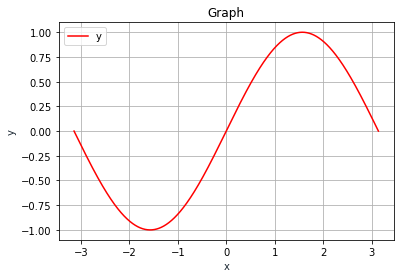

Entering training:
Iteration: 0, loss:  66607.703125, loss_delta: -66607.703125


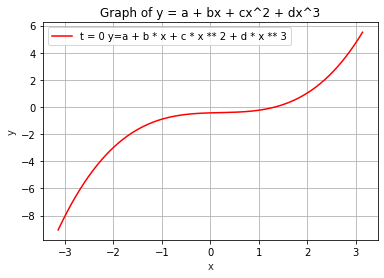

Iteration: 1000, loss:  23.562593460083008, loss_delta: 0.05809783935546875


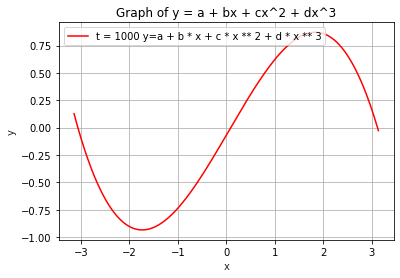

Iteration: 2000, loss:  9.121583938598633, loss_delta: 0.0011653900146484375


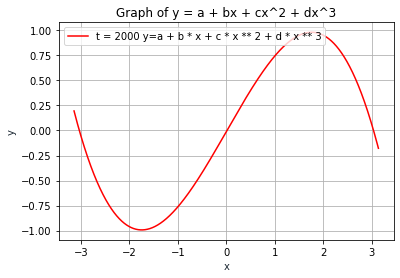

Iteration: 3000, loss:  8.824199676513672, loss_delta: 2.47955322265625e-05


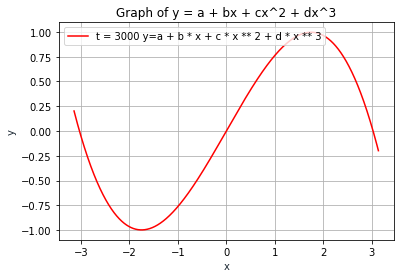

Training has reached the local minimum
Training finished after 3840 iterations
Current loss:8.817489624023438
Total stagnation:79
Parameters: 
Learning rate: 1e-06,  
Result: y = -0.000520257861353457 + 0.8564623594284058 x + 8.975340460892767e-05 x^2 + -0.0932907685637474 x^3
Losses:


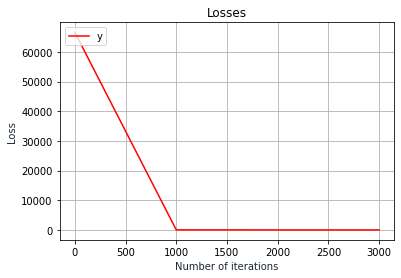

In [47]:
# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

number_of_iterations = 100001

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# the function to approximate
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
plt.plot(x.cpu(), y.cpu(), '-r', label='y')
plt.title('Graph')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Function to approximate:")
plt.show()

losses_x = []
losses_y = []
previous_loss = 0
current_loss = 0
loss_delta = 0
max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
stagnation_counter = 0
total_stagnation = 0
accepted_number_of_stagnation = 500

# the training loop
print("Entering training:")
for t in range(number_of_iterations):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y)

    # determine the rate at which the losses are changing
    current_loss = loss.item()
    loss_delta = previous_loss - current_loss
    previous_loss = current_loss
    if t % 1000 == 0:
        losses_x.append(t)
        losses_y.append(current_loss)
        print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

    # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
    if abs(loss_delta) < max_stagnant_loss_rate:
      stagnation_counter += 1
    else:
      total_stagnation += stagnation_counter
      stagnation_counter = 0

    if stagnation_counter > accepted_number_of_stagnation:
      print(f"Training has reached the local minimum")
      break

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 1000 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='t = ' + str(t) + ' y=a + b * x + c * x ** 2 + d * x ** 3')
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f"Training finished after {t} iterations")
print(f"Current loss:{current_loss}")
print(f"Total stagnation:{total_stagnation}")
print("Parameters: ")
print(f"Learning rate: {learning_rate},  ")

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# a graph of the losses
plt.plot(losses_x, losses_y, '-r', label='y')
plt.title('Losses')
plt.xlabel('Number of iterations', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Losses:")
plt.show()

Training for x*sin(x)

In [ ]:
# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

number_of_iterations = 100001

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# the function to approximate
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = x*torch.sin(x)
plt.plot(x.cpu(), y.cpu(), '-r', label='y')
plt.title('Graph')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Function to approximate:")
plt.show()

losses_x = []
losses_y = []
previous_loss = 0
current_loss = 0
loss_delta = 0
max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
stagnation_counter = 0
total_stagnation = 0
accepted_number_of_stagnation = 500

# the training loop
print("Entering training:")
for t in range(number_of_iterations):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y)

    # determine the rate at which the losses are changing
    current_loss = loss.item()
    loss_delta = previous_loss - current_loss
    previous_loss = current_loss
    if t % 1000 == 0:
        losses_x.append(t)
        losses_y.append(current_loss)
        print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

    # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
    if abs(loss_delta) < max_stagnant_loss_rate:
      stagnation_counter += 1
    else:
      total_stagnation += stagnation_counter
      stagnation_counter = 0

    if stagnation_counter > accepted_number_of_stagnation:
      print(f"Training has reached the local minimum")
      break

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 5000 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='t = ' + str(t) + ' y=a + b * x + c * x ** 2 + d * x ** 3')
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f"Training finished after {t} iterations")
print(f"Current loss:{current_loss}")
print(f"Total stagnation:{total_stagnation}")
print("Parameters: ")
print(f"Learning rate: {learning_rate},  ")

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# a graph of the losses
plt.plot(losses_x, losses_y, '-r', label='y')
plt.title('Losses')
plt.xlabel('Number of iterations', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Losses:")
plt.show()